# Introduction

In this project, we are going to explore a dataset of customers of a shopping mall and learn the concept of clustering or customer segmentation also known as Market Basket Analysis. The following features are available along with target variable for analysis:

* age: age of customer

* gender: gender of customer, female or male

* income: annual income of the customer

* spending score: Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data

We will explore the data and relations with spending score and group the customers into different categories using KMeans Clustering.

In [164]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
sns.set_theme(style="darkgrid")
%matplotlib inline


# Data

## Collection

In [165]:
# load dataset to a pandas dataframe
df = pd.read_csv("dataset/Mall_Customers.csv")

## Assess

In [166]:
# first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
# shape of the dataset
df.shape

(200, 5)

In [168]:
# basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Structure of Dataset

> There are 200 individuals in the dataset with features like age, gender, income and spending score.

### Main feature(s) of interest in dataset.
> We are interested in checking the relation among the features and spending score.

In [169]:
# statistical info of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [170]:
# check for duplicated values
sum(df.duplicated())

0

## Quality

* No missing or duplicate value observed.
* No outlier observed.
* Label Encoding can be done for Gender.
* Customer ID can be dropped.
* Columns can be renamed for ease of use.

## Clean

In [171]:
# creating a copy of the dataset
df_clean = df.copy()

### Encode labels for gender

In [172]:
le = LabelEncoder()

In [173]:
# transforming for gender

df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

In [174]:
# check for transformation
print(df['Gender'].unique())
print(df_clean['Gender'].unique())

['Male' 'Female']
[1 0]


> Male is encoded to 1 and female to 0.

### Drop the Customer ID column

In [175]:
df_clean.drop('CustomerID', axis=1, inplace=True)

In [176]:
# check whether the column has been dropped
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Rename the columns

In [177]:
df_clean.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [178]:
# check whether the columns have been renamed
df_clean.head()

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Saving Data

In [179]:
df_clean.to_csv("dataset/Mall_Customers_clean.csv", index=False)

## Visualization

In [180]:
df = pd.read_csv('dataset/Mall_Customers_clean.csv')

### Univariate Exploration

#### Distribution of Age

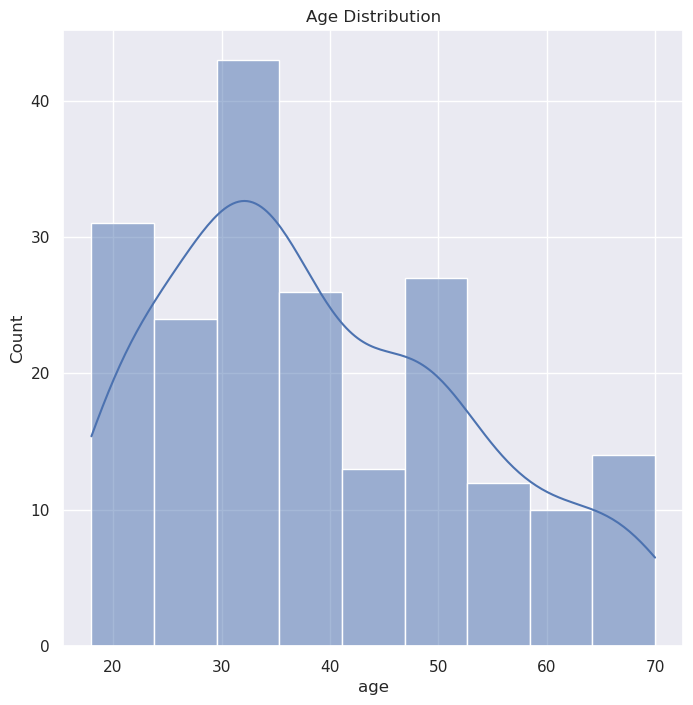

In [181]:
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.histplot(data=df, x='age', kde=True, alpha=0.5)
plt.show()

**From the above plot we can observe spike in age brackets of 20-25, 30-35 & 45-50 and majority shoppers belong in the 30-35 age group.**

#### Distribution of Gender

In [183]:
#creating a new dataframe
gender_df = df.groupby('gender').agg({'age':'count'})

gender_df['perc'] = (gender_df['age']/gender_df['age'].sum())*100

gender_df

,age,perc
gender,,
0,112,56.0
1,88,44.0


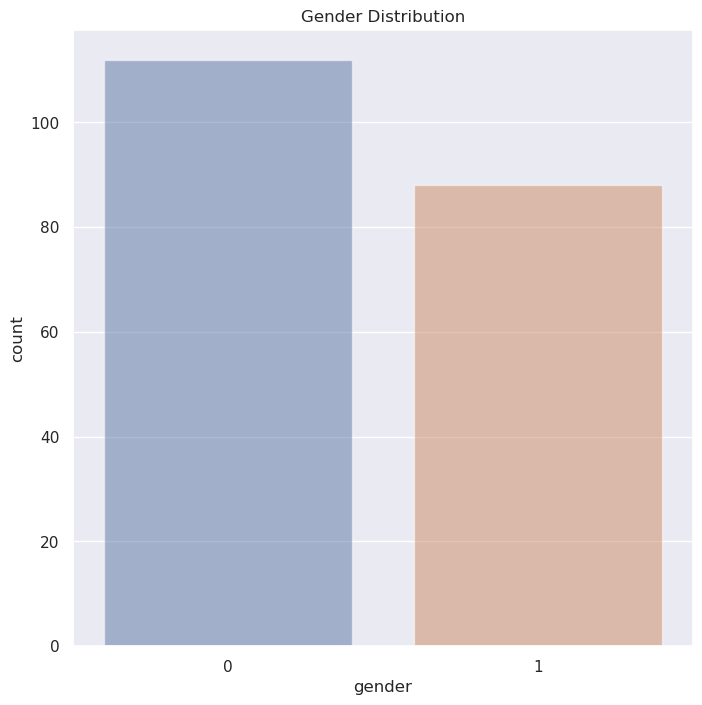

In [184]:
plt.figure(figsize=(8,8))
plt.title("Gender Distribution")
sns.countplot(data=df, x='gender', alpha=0.5)
plt.show()


**From the above plot we can see that females shop more than females.**

#### Distribution of Income

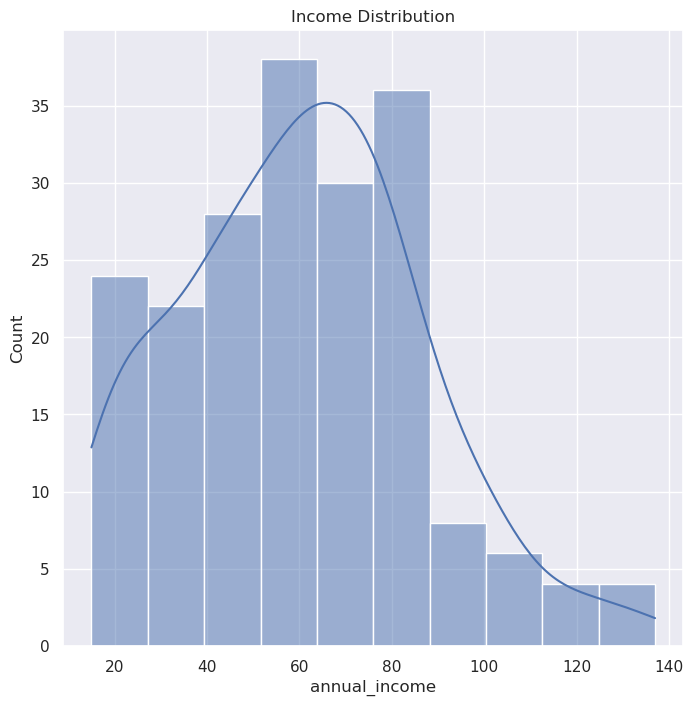

In [185]:
plt.figure(figsize=(8,8))
plt.title("Income Distribution")
sns.histplot(data=df, x='annual_income', kde=True, alpha=0.5)
plt.show()

**From the above plot we can observe that the average income lies between 50 to 80.**

#### Distribution of Spending Score

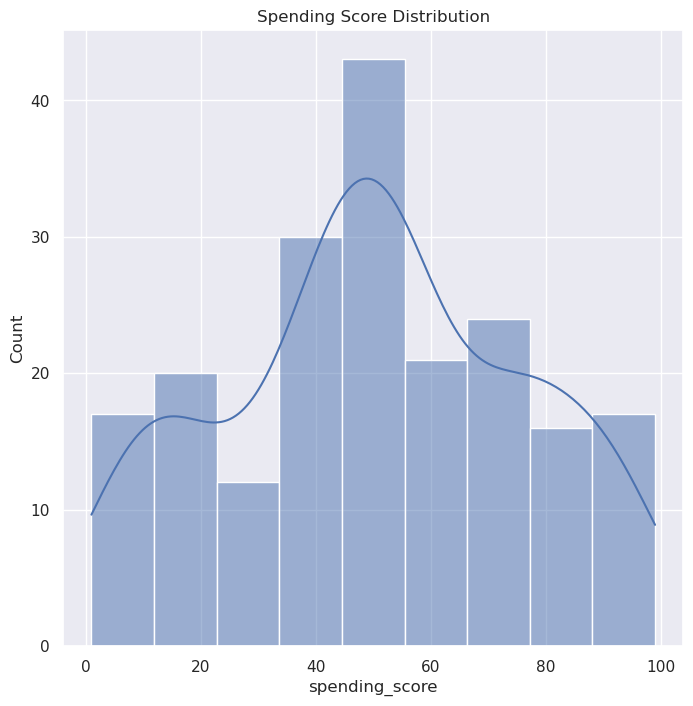

In [186]:
plt.figure(figsize=(8,8))
plt.title("Spending Score Distribution")
sns.histplot(data=df, x='spending_score', kde=True, alpha=0.5)
plt.show()

**From the above plot we can observe that average spending score is between 40 to 60.**

### Bivariate Exploration

#### Relation between Age and Gender

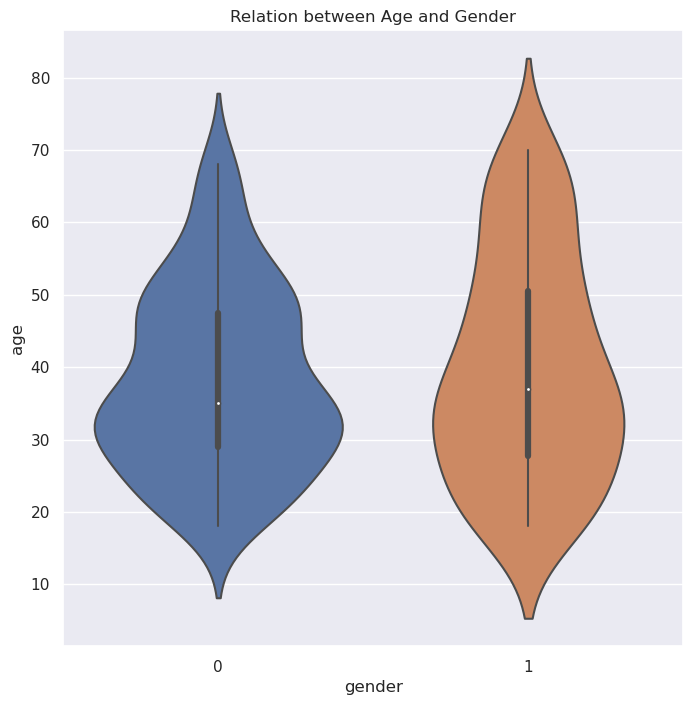

In [188]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Gender")
sns.violinplot(data = df, x = 'gender', y = 'age')
plt.show()

**From the above plot we can observe there are more males and females in the age group of 25 to 35.**

#### Relation between Age and Income

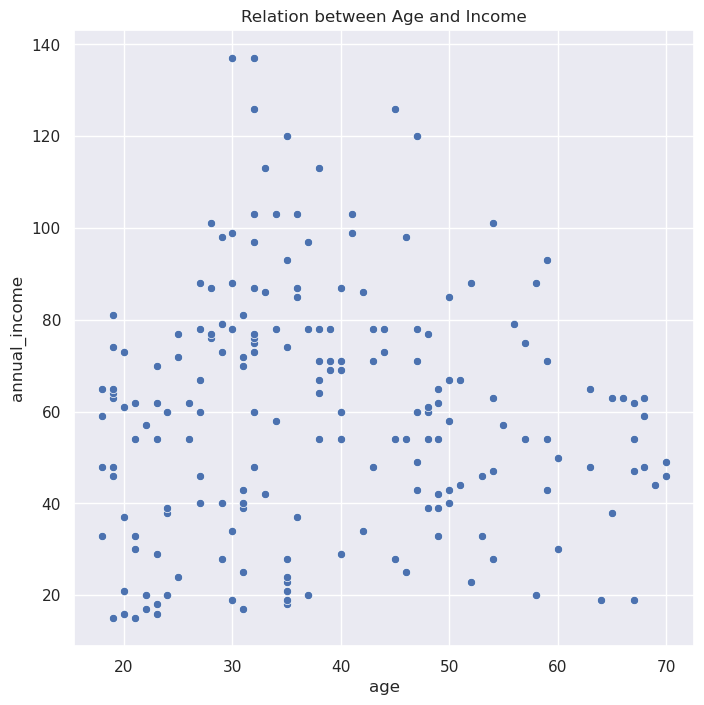

In [189]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Income")
sns.scatterplot(data = df, x = 'age', y = 'annual_income')
plt.show()

**We can observe that people in the range of 30 to 50 earn higher as compared to others.**

#### Relation between Gender and Income

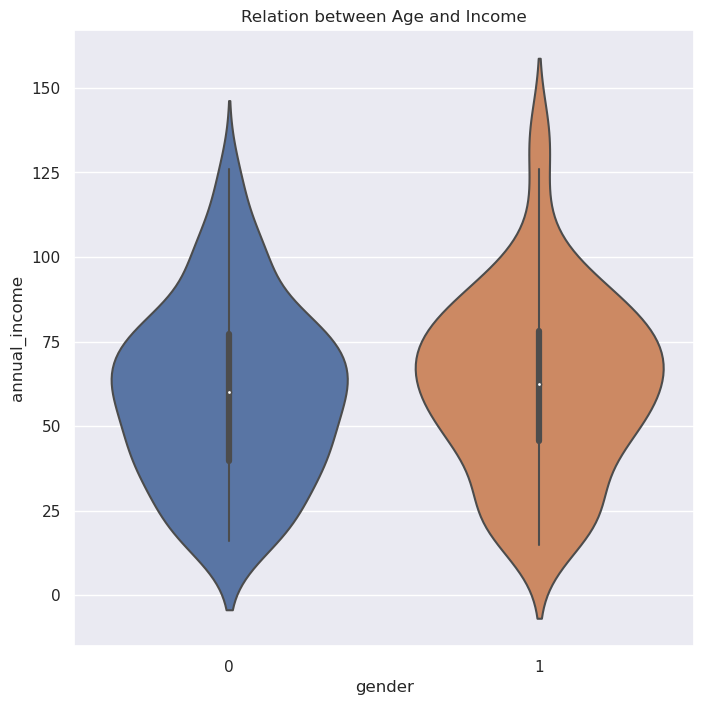

In [190]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Income")
sns.violinplot(data = df, x = 'gender', y = 'annual_income')
plt.show()

**From the above plot we can observe that males earn higher than females.**

#### Relation between Age and Spending Score

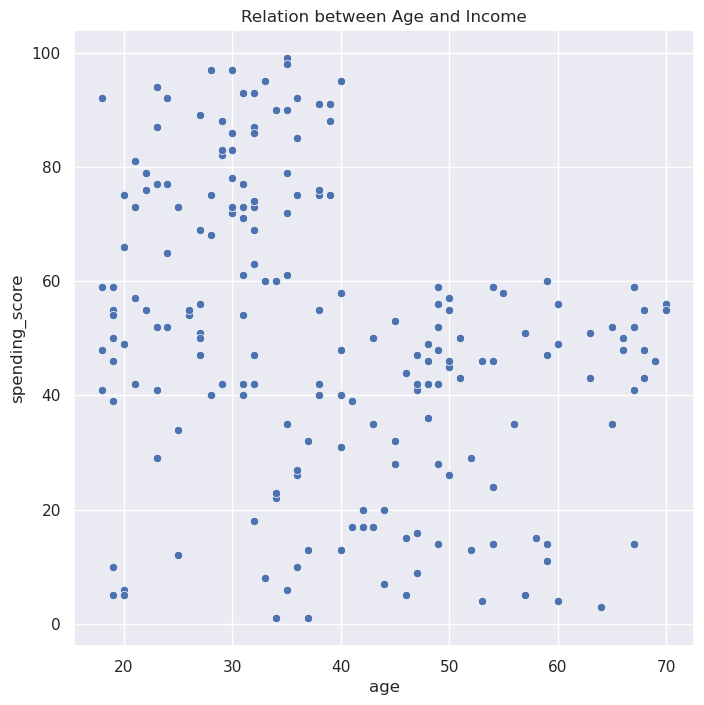

In [191]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Income")
sns.scatterplot(data = df, x = 'age', y = 'spending_score')
plt.show()

**From the above plot spending score is high for age group of 20 to 40 and then it dicreases.**

#### Relation between Gender and Spending Score

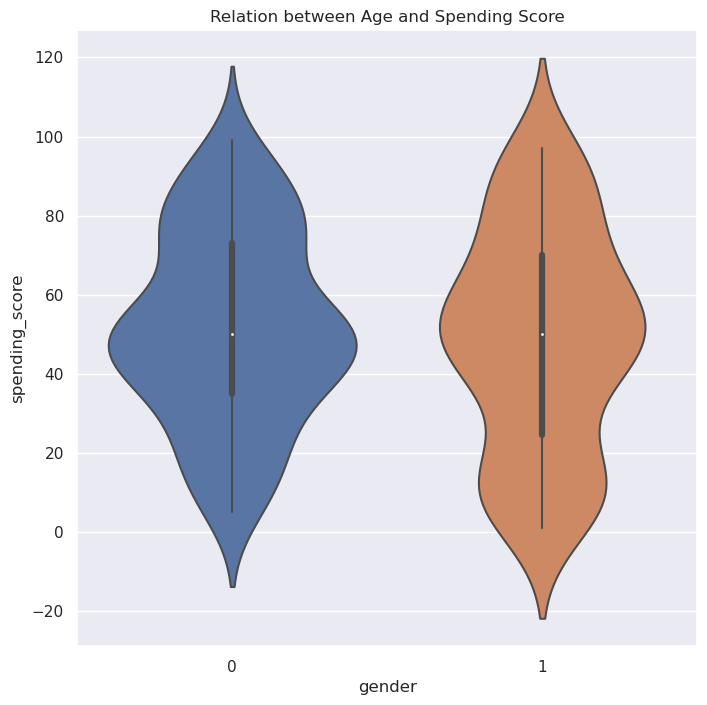

In [192]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Spending Score")
sns.violinplot(data = df, x = 'gender', y = 'spending_score')
plt.show()

**From the above plot we can observe that the spending score is higher for females.**

#### Relation between Annual Income and Spending Score

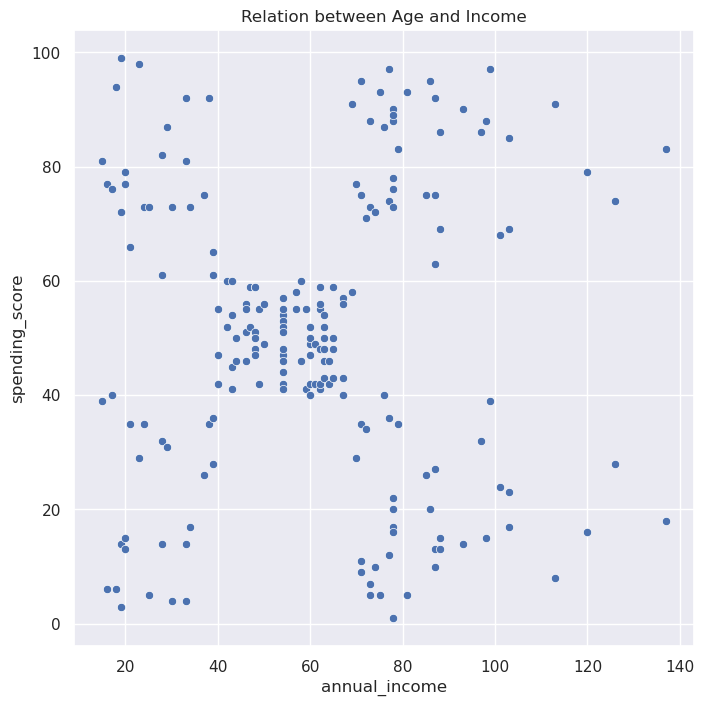

In [193]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Income")
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score')
plt.show()

**From the above plot we can see that there are 5 clusters being created.**
* With annual income between 20-40, we see 2 clusters one with low and other with high spending score.
* In 40 to 60 income range we see an average spending score.
* With income range from 80 to 140 again we see 2 clusters one with low and other with high spending score.

## Data for model

In [196]:
X = df.drop(columns=['age', 'gender'], axis=1, inplace=True)

# Model

## Determining number of Cluster

In [198]:
# choosing number of clusters
# WCSS > Within clusters sum of squares

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(df)

    wcss.append(kmeans.inertia_)

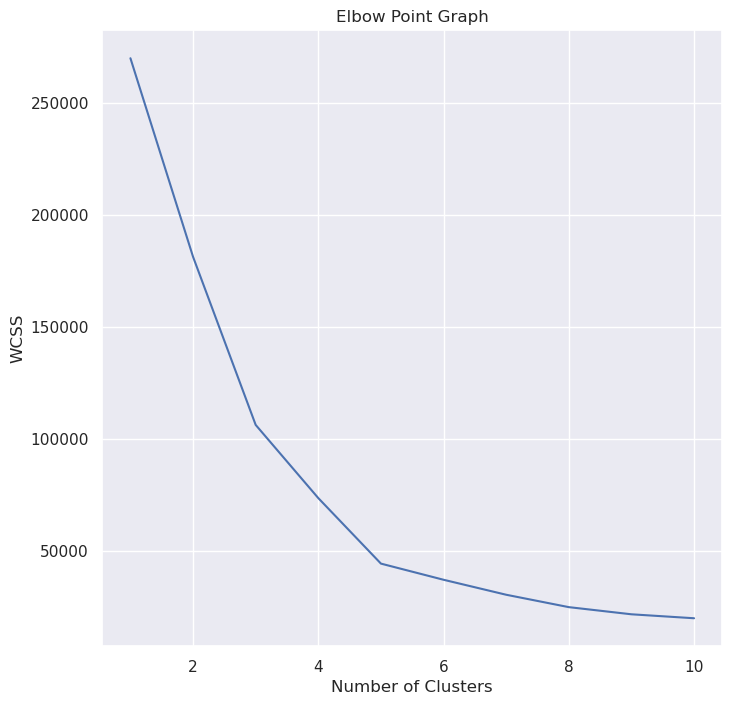

In [199]:
# plot an elbow graph

plt.figure(figsize=(8,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Optimum number of Clusters: 5**

## Training

In [201]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=2)

# return label for each datapoint based on cluster
Y = kmeans.fit_predict(df)

## Visualizing Clusters

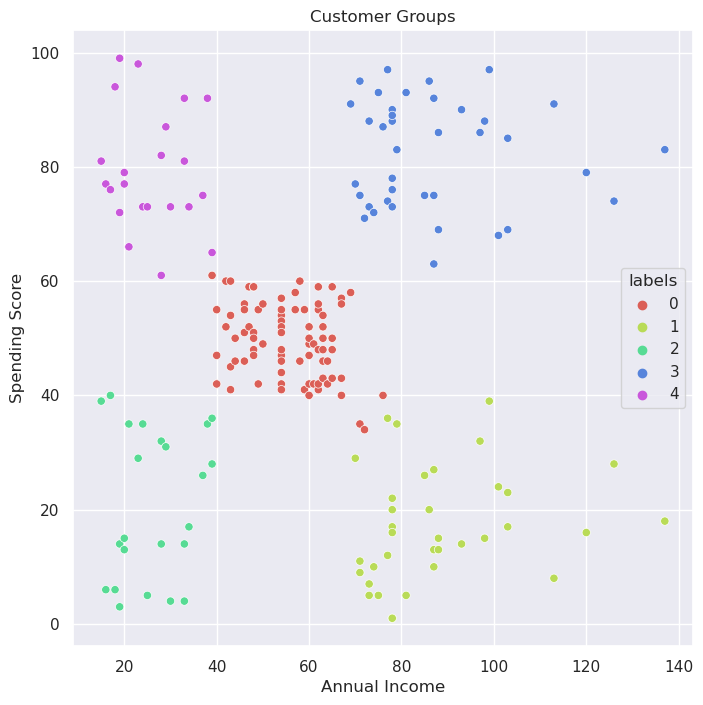

In [204]:
# plotting clusters and centroid

plt.figure(figsize=(8,8))
df['labels'] = kmeans.labels_

sns.scatterplot(x=df['annual_income'], y=df['spending_score'], hue=df['labels'],
                palette=sns.color_palette('hls', 5))

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Results

We build the KMeans clustering model and found out the optimum number of clusters for our dataset using WCSS.

* The optimum number of clusters are 5.
* With annual income between 20-40, we see 2 clusters one with low and other with high spending score.
* In 40 to 60 income range we see an average spending score.
* With income range from 80 to 140 again we see 2 clusters one with low and other with high spending score.